In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate

In [2]:
calicut_temp = [] = []
calicut_iso_time = []
calicut_time = []
PATH = "../../CLIMATE_DATA/CALICUT/"
for year in range(1991,2022):
    fname = "temp_"+str(year)+".csv" 
    f = open(PATH+fname, 'r')
    for line in f:
        line = line.strip()
        line = line.split()
        temp = float(line[1].split(",")[0])/10
        if temp < 800:
            calicut_iso_time = np.append(calicut_iso_time, datetime.datetime.fromisoformat(line[0]))
            calicut_time = np.append(calicut_time, datetime.datetime.fromisoformat(line[0]).timestamp())
            calicut_temp = np.append(calicut_temp, temp)

In [8]:
binned_times = np.linspace(np.min(calicut_time), np.max(calicut_time), 11300)
binned_iso_time = []
temp_interp = interpolate.interp1d(calicut_time, calicut_temp)
inter_ctemp = temp_interp(binned_times)

for time in binned_times:
    binned_iso_time = np.append(binned_iso_time, datetime.datetime.fromtimestamp(time))

(20.0, 40.0)

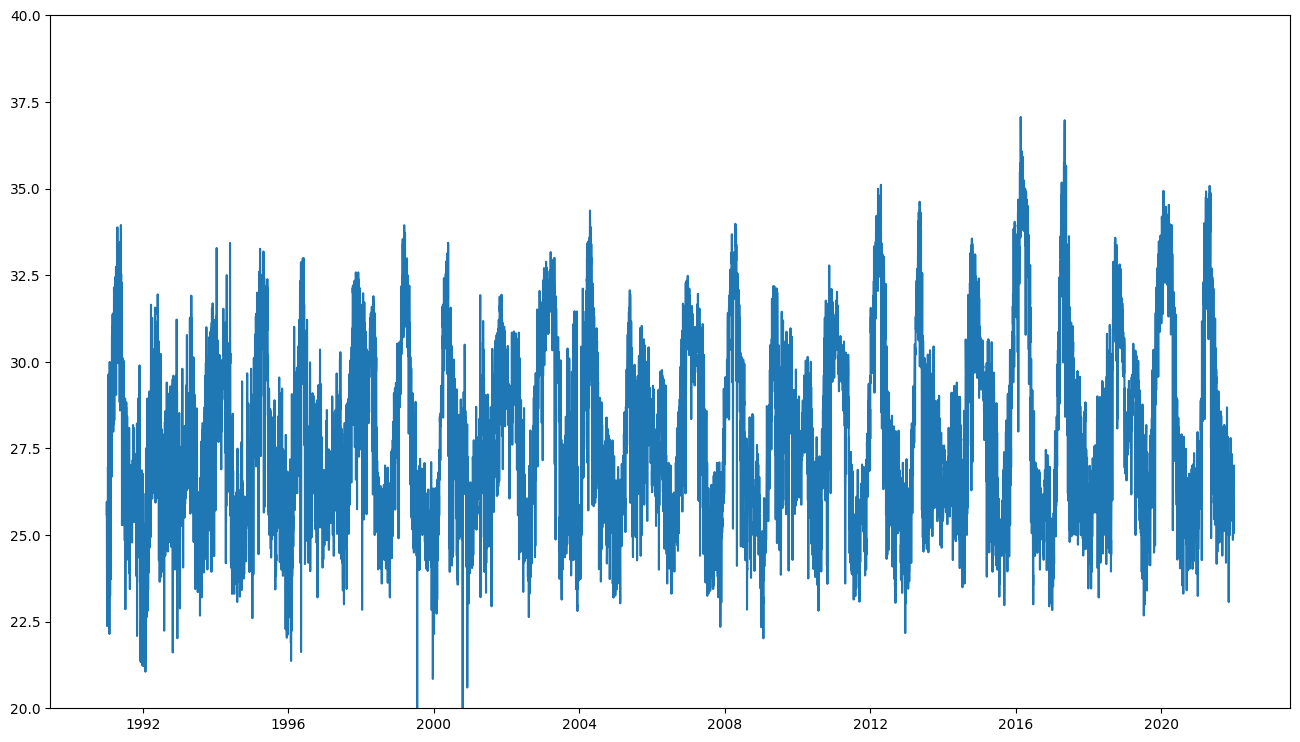

In [9]:
# plt.figure(figsize=(16,9))
# plt.plot(calicut_iso_time, calicut_temp)
# plt.ylim(20,40)

plt.figure(figsize=(16,9))
plt.plot(binned_iso_time, inter_ctemp)
plt.ylim(20,40)